<center>

## **<font color='green'>Heart disease UCI - Exploratory Data Analisys (EDA)**</font> 

<center>
<img src="http://reillyrangel.com.br/wp-content/uploads/2016/10/medicina-saude-tecnologia-computacao-microsoft-cancer-google-apple-ibm-reilly-rangel-s.jpg" width=50%/>

Author: [Paulo Henrique Zen Messerschmidt](https://www.linkedin.com/in/paulo-henrique-zen-messerschmidt-35581661/)



This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. ([Kaggle DataSet](https://www.kaggle.com/ronitf/heart-disease-uci))

The "target" feature refers to the presence of heart disease in the patient. It is integer value: 0 (no presence); 1 (presence of heart disease).

The description of the dataset features can be found in [this link](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)


### Importing libraries: preparing the enviroment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py


import warnings
warnings.filterwarnings('ignore')

py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

%matplotlib inline
# Plot in SVG format since this format is more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
path = 'heart.csv'
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Features**:
- Age: age in years;
- Sex: 1 = male; 0 = female;
- Cp: chest pain type:  0 - Typical angina; 1 - atypical angina; 2 - non-anginal pain; 3 - asymptomatic;
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: fastin blood sugar: 1 - true; 0 - false)
- restecg: resting electrocardiographic results: 0 - normal ; 1 - wave abornamility - T wave inversions and/or ST elevation or depression of > 0.05 mV; 2 - showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina: 1 - yes; 0 - no
- oldpeak: ST depression induced by exercise relative to rest 
- slope: the slope of the peak exercise ST segment: 0 - upsloping; 1 - flat; 2 - downsloping;
- ca: number of major vessels (0-3) colored by flourosopy
- <font color='green'>thal: 1 - normal; 2 - fixed defect; 3 - reversable defect **CHECK** </font>
- target: 0 - Healthy; 1 - sick (heart disease)

**We can divide these features in two groups: quantitative and categorical**
- Quantitative features: Age, trestbps, chol, thalach, oldpeak
- Categorical features: sex, cp, fbs, restecg, exang, slope, ca, thal


Obs.: our target feature is categorical (classification problem)

In [3]:
num_cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

Por hora não precisamos operar com as variáveis categórias em formato numérico.Vamos transformar nossas variáveis categóricas (sexo e exang) para textos para facilitar a leitura dos dados.


In [4]:
df['sex'] = df['sex'].apply(lambda x: 'male' if x == 1 else 'female')
df['exang'] = df['exang'].map({1: 'Yes', 0:'No'})

### Dataset analysis

**Let's take a look in the dataset shape**

In [5]:
df.shape

(303, 14)

303 samples and 14 features

**Verifying the features name**

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Verificando o tipo primitivo dos dados de cada coluna**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null object
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null object
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.2+ KB


That's good, there's no missing values (all features has 303 samples).

**Let's see the statistics of our dataset.**

In [8]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Highlights:

- 25% of samples are around 61 years old or older.
- 50% of samples have a cholesterol level up to 240.


# Data visualization

### Univariate visualization

Let's configure our plots (size and style).

In [9]:
plt.rcParams['figure.figsize']= (12,8) # figure size
sns.set_style('darkgrid') # Style

## Age

**Let's plot a histogram for age using matplotlib**

Text(0.5,1,'Age distribuition')

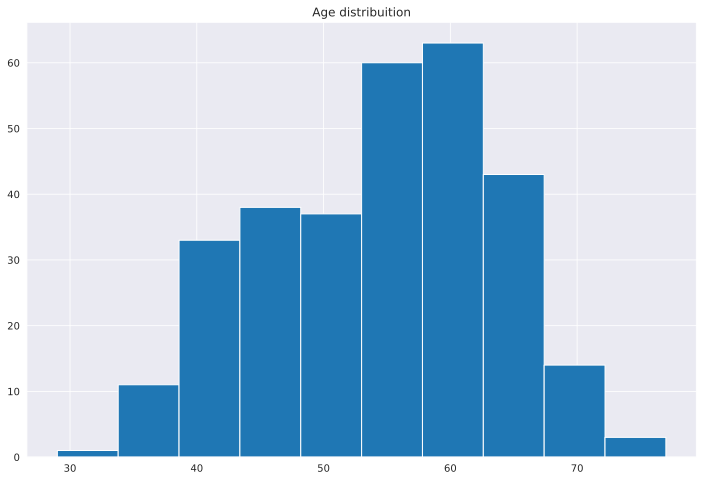

In [10]:
df['age'].hist(grid=True, bins=10); 
plt.title('Age distribuition')

Apparently, the age feature not follow a normal distribution. It's not so clear in this chart. Let's plot a density plot using seaborn.

Obs.: bin param can affect the shape of distribution.

**Density plots using seaborn**

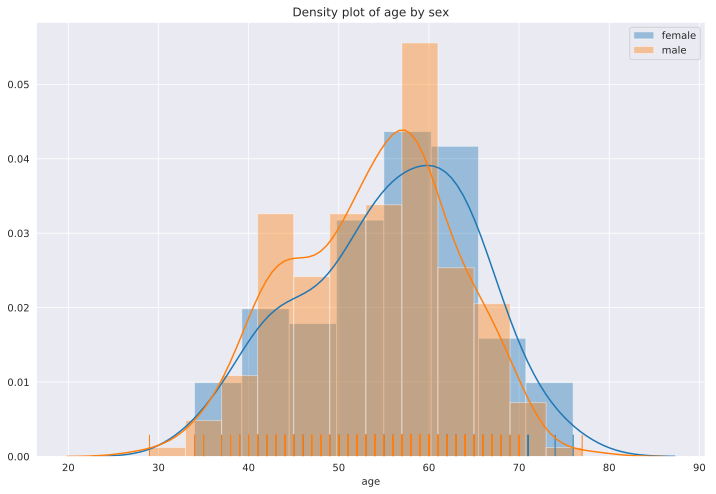

In [11]:
sns.distplot(df[df['sex']=='female']['age'], rug=True, hist=True, label='female')
sns.distplot(df[df['sex']=='male']['age'], rug=True, hist=True, label='male')
plt.legend()
plt.title('Density plot of age by sex');


Density graph shows the smoothed distribution of points along the numerical axis. The density peaks
where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

Recommended materials: [1](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Density_Plots.pdf); [2](https://homepage.divms.uiowa.edu/~luke/classes/STAT4580/histdens.html)

### Using Plotly

**Let's draw a histogram for the "Age" feature**

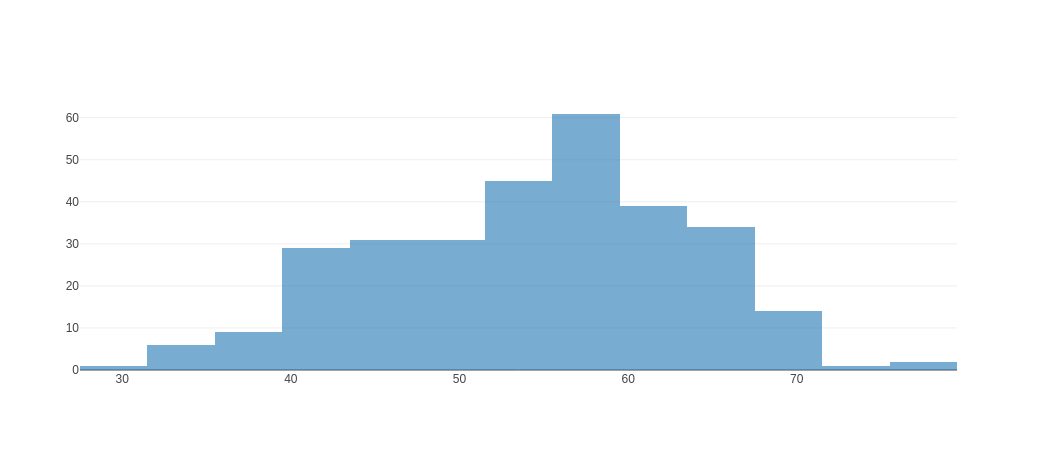

In [12]:
age = df['age']
layout = go.Layout(barmode='overlay')
data = go.Histogram(x=age, opacity=0.6, xbins={'size': 4})
fig = go.Figure(data=[data], layout=layout)
py.offline.iplot(fig)

## **Resting blood pressure (in mm Hg on admission to the hospital)**

Let's check the distribuition

Text(0.5,1,'Resting Blood pressure distribuition')

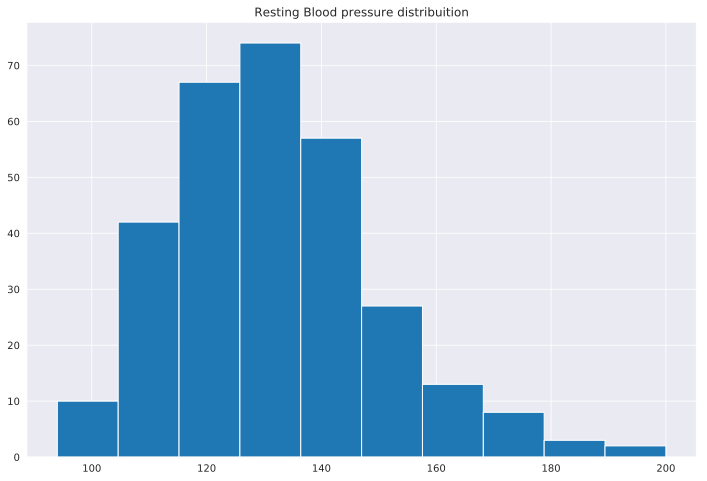

In [13]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

Interesting, it seems that we have a normal distribution

### Let's create a density plot

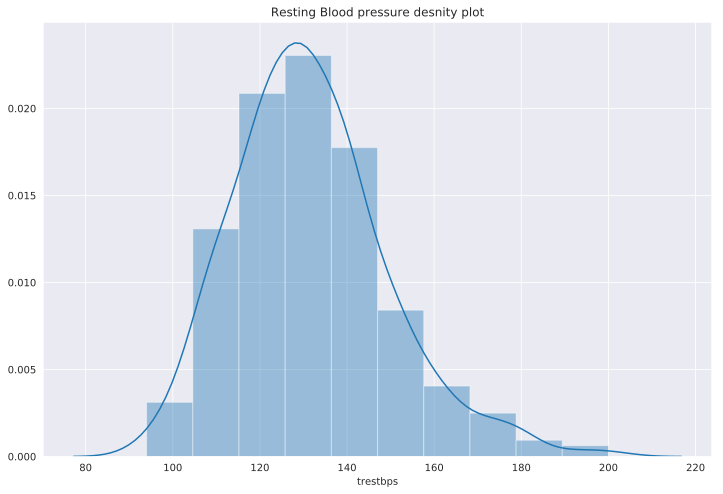

In [14]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

Let's plot a histogram for all continuous variables using the df.hist()

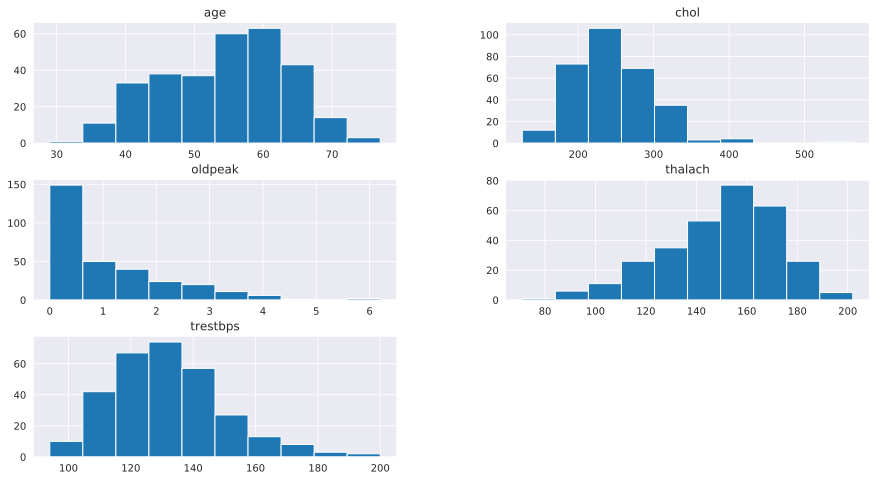

In [15]:
plt.rcParams['figure.figsize']= (15,8) # reajustar o tamanho da figura 

df[[ 'age','trestbps', 'chol', 'thalach', 'oldpeak']].hist();


- Chol: apparently is quite close to a normal distribution. However it is possible to notice a high value (acmia of 500) that can be a possible outlier!

- Oldpeak: It seems to follow a left-skewed distribution (lognormal).

- Thalach: the maximum heart rate achieved seems to follow a right-skewed distribution

- Trestbps: Resting blood pressure appears to follow a normal distribution.

**Let's check outliers presence using boxplots**

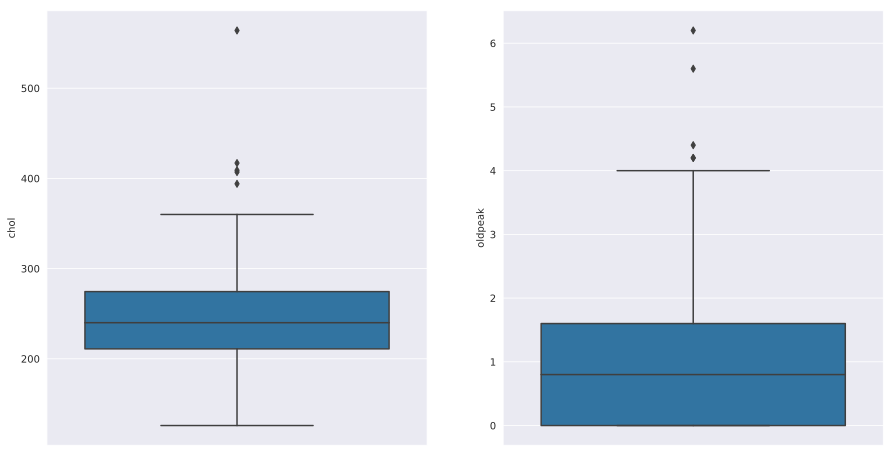

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, orient='v', ax=axes[0])
sns.boxplot(x='oldpeak', data=df,  orient='v', ax=axes[1]);

## Categorical features

Let's start with the target variable to see the rate of people with and without heart disease

In [17]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

The number of unhealthy people is higher than the number of healthy people.

Let's check the proportion of men and women

In [18]:
df['sex'].value_counts()

male      207
female     96
Name: sex, dtype: int64

IndexError: index 2 is out of bounds for axis 0 with size 2

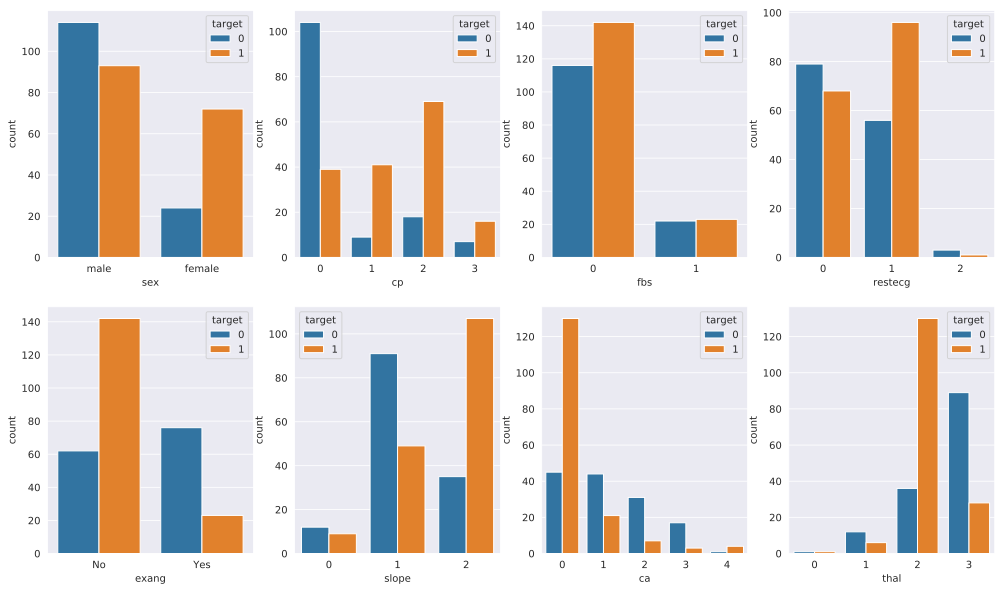

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/4), idx%4]
    if feature != 'target':
        sns.countplot(x=feature, hue='target', data=df, ax=ax)


Obs.: the error code above appears because we have 9 features (include target) but we create only 8 axes in subplots.

Let's get some insights frm this chart:

Chest pain: the heart desease diagnosis is greater among the patients that feel any chest pain.

Restegc - Eletrocardiagraph results: the rate of heart desease diagnoses higher for patients with a ST-T wabe abnormality .

Slope: The ratio of patients diagnosed with heart desease is higher for slope = 2 

Ca: The diagonosed ratio decreases fo ca between 1 and 3.

Thal: the diagnosed ratio is higher for thal = 2.

Let's perform a multivariate analysis, comparing the number of healthy and unhealthy people by sex.


Text(0.5,1,'Count of target feature by sex')

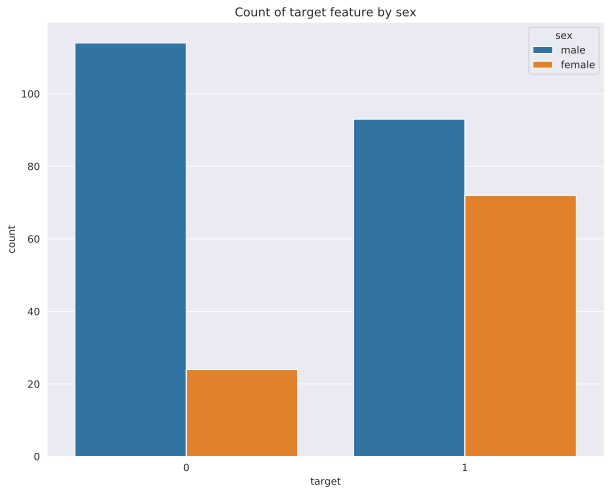

In [21]:
plt.rcParams['figure.figsize'] = (10,8)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher. Let's create an index.

In [22]:
pd.crosstab(df['sex'], df['target'], normalize=True)

target,0,1
sex,,
female,0.079208,0.237624
male,0.376238,0.306931


We can see that most are healthy and are male.

Let's create one for each of the groups

In [23]:
sex_target = df.groupby(by=['sex', 'target']).size()
sex_target_pcts = sex_target.groupby(level=0).apply(lambda x: 100*x/x.sum())

sex_target_pcts

sex     target
female  0         25.000000
        1         75.000000
male    0         55.072464
        1         44.927536
dtype: float64

### Chest Pain type

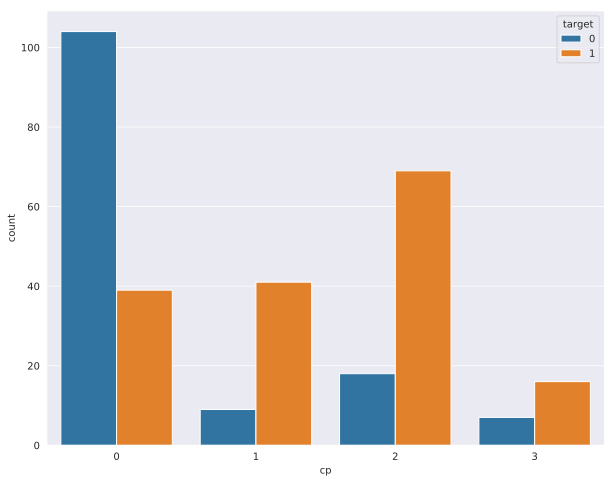

In [24]:
sns.countplot(x='cp', hue='target', data=df)

Most patients who experience some type of pain have heart disease

## Multivariate visualization

First let's evaluate the correlation between the numeric variables in our dataset. This information is important because some machine learning algorithms can not handle correlated input variables, such as linear and logistic regression.

Let's transform  `sex` and `exang` features applying `map()`.

In [26]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['exang'] = df['exang'].map({'No': 0, 'Yes': 1})


Let's create a correlation matrix using `sns.heatmap()`.

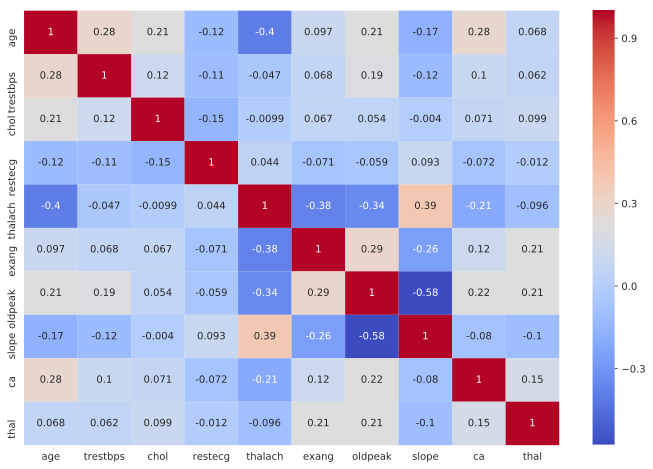

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['target', 'sex', 'cp', 'fbs'], axis=1).corr(), annot=True, cmap='coolwarm');

Apparently there are no features with a pretty strong correlation (above |0.7|)

## Scatterplot matrix

When the number of variables is relatively small we can plot a grid with all variables. The diagonal line shows the distribution of each variable.

<Figure size 2160x2160 with 0 Axes>

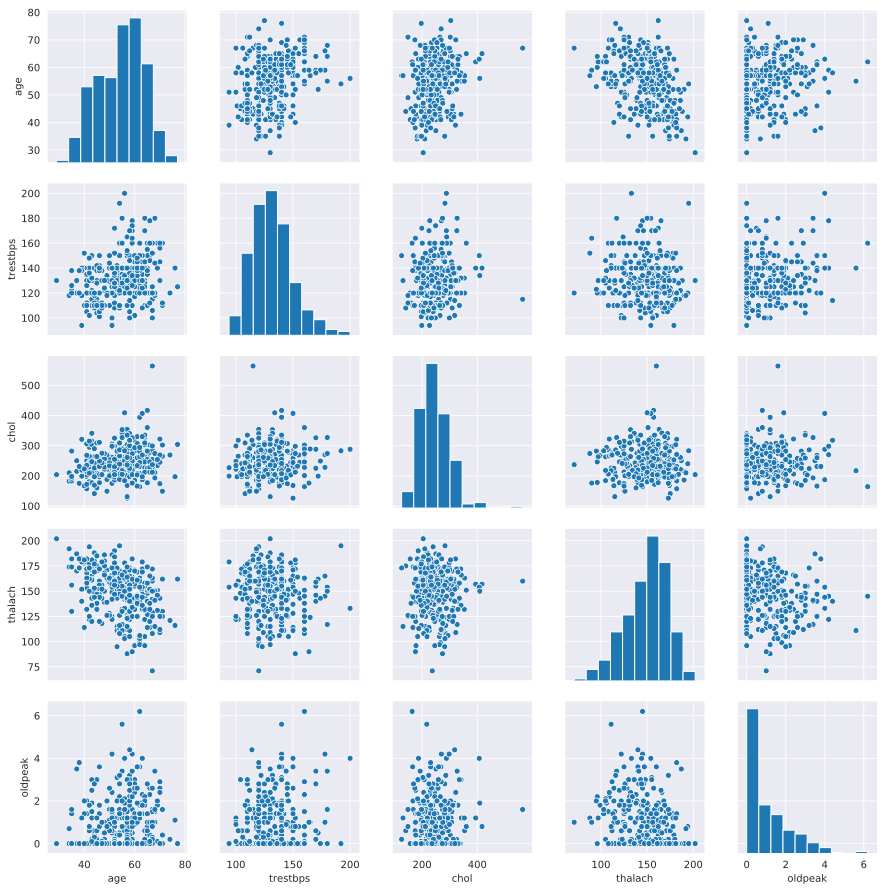

In [29]:
plt.figure(figsize=(30,30))
sns.set_style('darkgrid')
sns.pairplot(df[num_cont_feat])

## ScatterPlot

Text(0.5,1,' Cholesterol vs Blood pressure in rest')

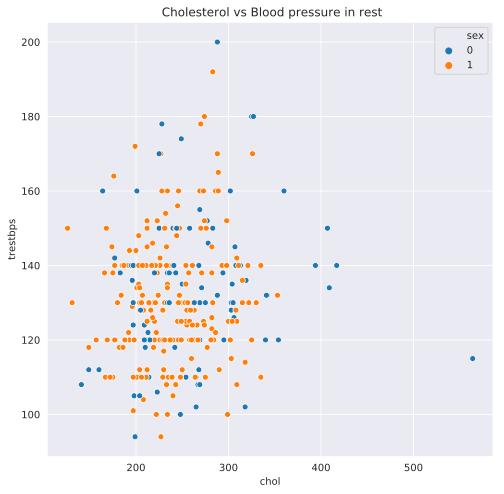

In [30]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='chol', y='trestbps', hue='sex', size=None, data=df)
plt.title(' Cholesterol vs Blood pressure in rest')

As can be seen there is a pacient with high cholesterol. But, there's not a specific division between those that feel pain during exercise practice and those of not feel pain.
We can use hue to filter by sex. It's also possible to filter using size = 'label_to_filer'.

We can use a jointplot to get a scatter plot and a histogram of each feature.

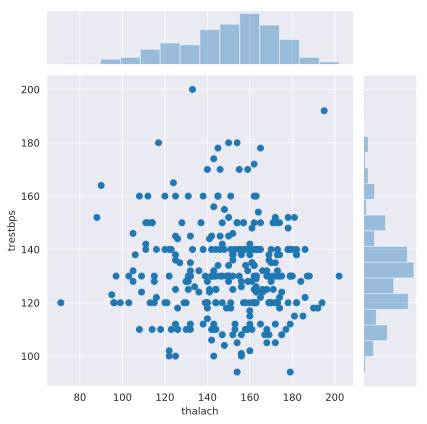

In [31]:
sns.jointplot(x='thalach', y='trestbps',  data=df)

We can set the parameter kind='kde' to get a smoothed version.

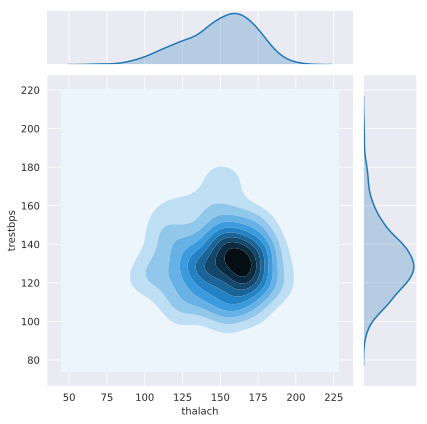

In [32]:
sns.jointplot(kind='kde', x='thalach', y='trestbps', data=df)

This plot uses a color scale to represent the density, i.e. the local where the majority of the data points fall. In this case, the points are concentrated around 170, 130 in the axis x and y respectively

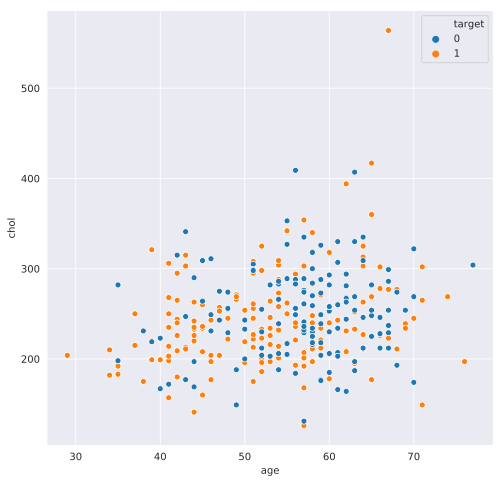

In [33]:
sns.scatterplot(x='age', y='chol', hue='target', data = df)

We can do de same using `plt.scatter()`

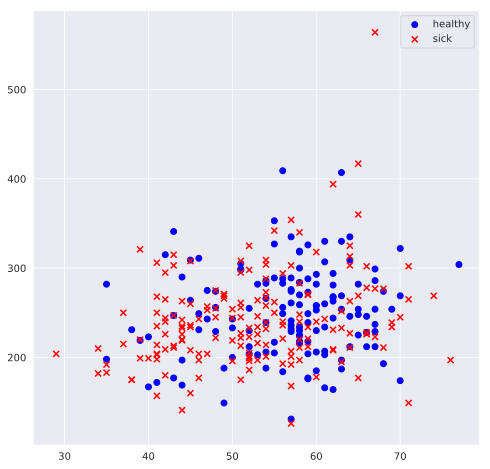

In [34]:
plt.figure()
plt.scatter(df[df['target'] == 0]['age'], df[df['target'] == 0]['chol'], marker='o', c='blue', label='healthy')
plt.scatter(df[df['target'] == 1]['age'], df[df['target'] == 1]['chol'], marker='x', c='red', label='sick')

plt.legend()

## Boxplots - Quantitative/Categorical Plots

Let's visualize the distribuition of chol by sex

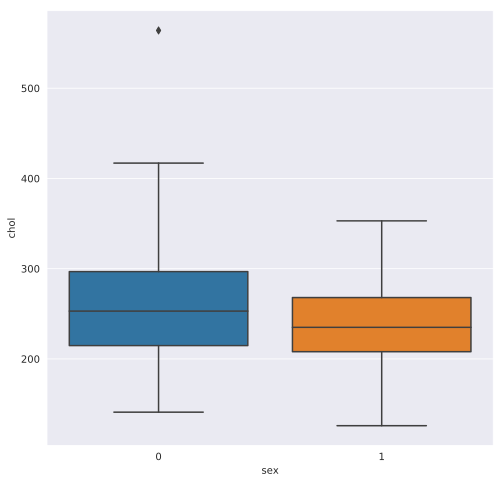

In [35]:
sns.boxplot(x='sex', y='chol', data=df)

Apparently, female patients has  higher cholesterol indices than male patients.

Let's plot a `catplot` to visualize how the cholesterol and chest pain type are relationed.

<Figure size 1080x720 with 0 Axes>

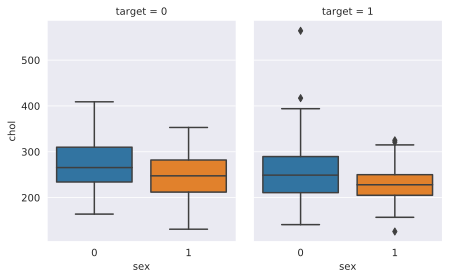

In [36]:
plt.figure(figsize=(15,10))
sns.catplot(x='sex', y='chol', col='target', data=df, kind='box', height=4, aspect=.8)

Let's visualize if the diagnose is influenced by age

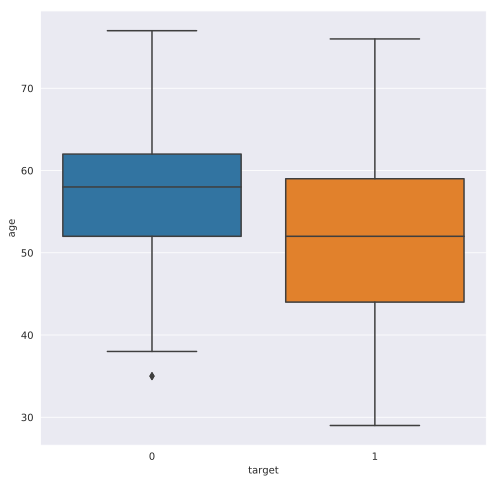

In [37]:
sns.boxplot(y='age', x='target', data = df)

It's no clearif the age of patient influence on diagnosis. Apparently not.

We can use plotly to plot the boxplots

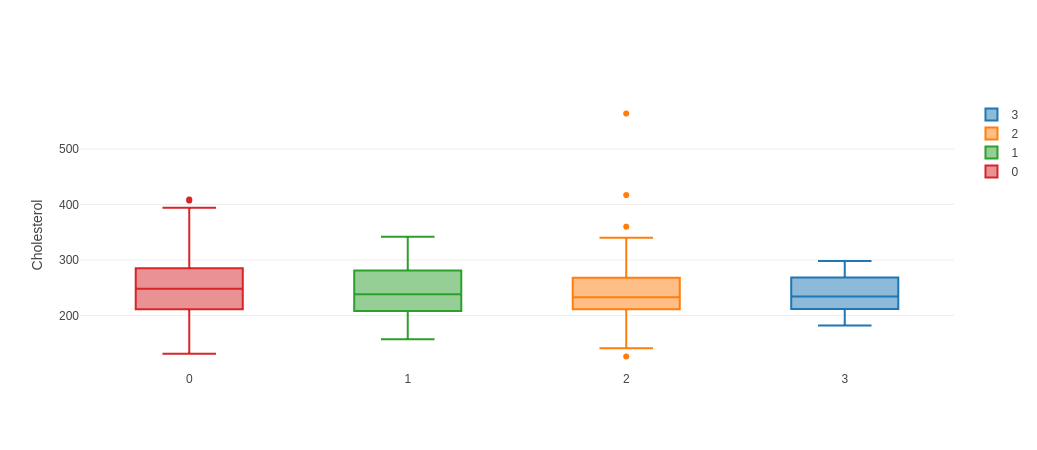

In [38]:
# First let's create a list to append the data to be plotted
data = []
for pain in df.cp.unique():
    data.append(go.Box(y=df[df.cp == pain].chol, name=str(pain)))

layout = go.Layout(yaxis=dict(title ='Cholesterol', zeroline=False))
                   
fig = go.Figure(data=data, layout=layout)               
py.iplot(fig, show_link=False)

Apparently, higher colesterol values are relationed with these three types of pain. (See the max values)

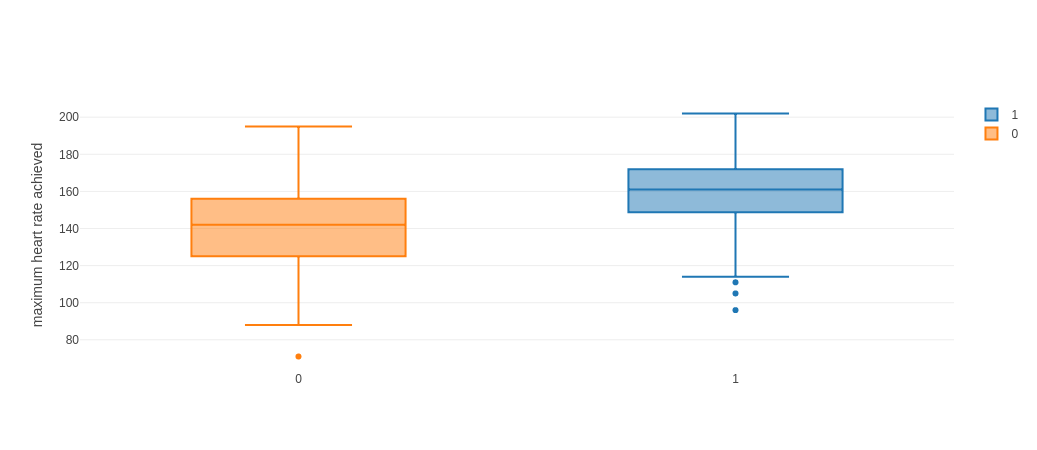

In [39]:
# First let's create a list to append the data to be plotted
data = []
for target in df.target.unique():
    data.append(go.Box(y=df[df.target == target].thalach, name=str(target)))

layout = go.Layout(yaxis=dict(title ='maximum heart rate achieved', zeroline=False))
                   
fig = go.Figure(data=data, layout=layout)               
py.iplot(fig, show_link=False)

Those patients that was diagnosed with heart desease had higer maxium heart rate.

## Prediction model

Firstly, let's consider the problem context  before testing different algorithms for classification task.

Here, we'll first create a Decision Tree Model, for main two reasons:
- It's a simple and well know algorithm. 
- We can use flow diagrams to visual representations of decisions trees. Since we are predictin heart desease, we can use it to sharing the knowledge with a medical in order to ensure that our model make sense;

**Firts let's split our dataset in train and test**

In [42]:
# Import train test split

from sklearn.model_selection import train_test_split

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here, we don't need to standardize the data in a scale because decisions tree it's not affected by data scale.


In [44]:
# Split the DataFrame into a matrix X and vecto Y which form the train set
X, y = df.drop('target', axis=1), df['target']

In [45]:
X.shape, y.shape

((303, 13), (303,))

Here, we gonna create a train split and a holdout split, because we'll perform a [cross-validation](https://towardsdatascience.com/cross-validation-70289113a072) on our train split. 

In [46]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state = 17)

In [47]:
X_train.shape, X_holdout.shape

((212, 13), (91, 13))

Here, we'll use StratifiedKFold, since we want to keep the same proportion of labels in the train and test fold.
We'll also use GridSearchCV, that allows us to find the best hyperparameter combination.

In [48]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [49]:
# Let's specify 5 kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [50]:
# Let's create our hyperparameter grid using a dictionary

params = {'max_depth': np.arange(2,10), 
         'min_samples_leaf': np.arange(2,10),
         }


Importing the DecisionTree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [52]:
tree = DecisionTreeClassifier(random_state=17)

In [53]:
best_tree = GridSearchCV(estimator = tree, param_grid=params, n_jobs=1, verbose=1)

In [54]:
best_tree.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    1.6s finished
/home/zen/Enviroments/openml_pyplot/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [78]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 2}

In [79]:
best_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [57]:
best_tree.best_score_

0.7547169811320755

In [58]:
pred_holdout_better = best_tree.predict(X_holdout)

In [76]:
accuracy_score(y_holdout, pred_holdout_better)

0.7472527472527473

Let's visualize how decisions tree create the decisions rules

In [60]:
# First we'll import graphviz from sklearn.tree
from sklearn.tree import export_graphviz

Here we'll import some extra libraries that allow us to visualize the tree in the notebook

In [83]:
export_graphviz(decision_tree=best_tree.best_estimator_,
               out_file='tree.dot', filled=True, 
                feature_names=df.drop('target', axis=1).columns)

In [85]:
!cat tree.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="thalach <= 147.5\ngini = 0.489\nsamples = 212\nvalue = [90, 122]", fillcolor="#399de543"] ;
1 [label="cp <= 0.5\ngini = 0.417\nsamples = 91\nvalue = [64, 27]", fillcolor="#e5813993"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="trestbps <= 113.0\ngini = 0.274\nsamples = 61\nvalue = [51, 10]", fillcolor="#e58139cd"] ;
1 -> 2 ;
3 [label="exang <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]", fillcolor="#399de52a"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]", fillcolor="#399de5ff"] ;
3 -> 4 ;
5 [label="chol <= 225.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]", fillcolor="#e58139cc"] ;
3 -> 5 ;
6 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]", fillcolor="#e5813900"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]", fillcolor="#e58139ff"] ;
5 -> 7 ;
8 [label="age <= 63.5\ngini = 0.147\nsamples = 50\nvalue = [46, 4]", fillcolor="#e58139e9"] ;
2 -> 8 ;
9

## Copy the code above and paste in [this link](http://www.webgraphviz.com/) to visualize the Decision Tree 

Considering that we don't want to avoid [type II errors](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) let's check our f1score.



In [63]:
from sklearn.metrics import f1_score

In [64]:
print(f1_score(y_holdout, pred_holdout_better))

0.735632183908046


As can be seen, our f1-score is 0.75

Let's investigate the feature importances from our model, in order to check if we can create a simpler model.

In [65]:
importances = best_tree.best_estimator_.feature_importances_

<BarContainer object of 13 artists>

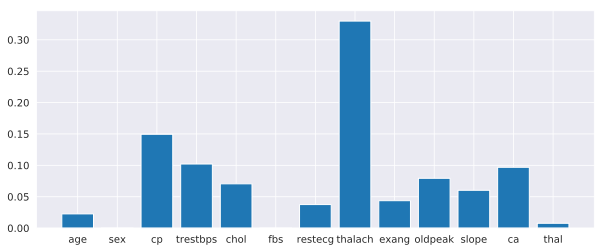

In [66]:
plt.figure(figsize=(10,4))
plt.bar(X_train.columns.values,importances)

As can be seen, fbs, sex and thal are not useful to predict heart disease.
Let's create a model without these features to see how the accuracy is affected.

## Reduced model

Let's import [clone](https://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html) from sklearn.

In [71]:
from sklearn.base import clone
from sklearn.metrics import f1_score, accuracy_score

In [72]:
X_train_reduced = X_train.drop(['sex', 'fbs', 'thal'], axis=1)
X_holdout_reduced = X_holdout.drop(['sex', 'fbs', 'thal'], axis=1)

In [73]:
X_train_reduced.shape, X_holdout_reduced.shape

((212, 10), (91, 10))

In [74]:
# Train on the "best" model found from grid search earlier
tree_reduceded_clone = (clone(best_tree.best_estimator_)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = tree_reduceded_clone.predict(X_holdout_reduced)

print("\nFinal Model trained on reduced data\n------")
print("Accuracy on Holdout data: {:.4f}".format(accuracy_score(y_holdout, reduced_predictions)))
print("F1-score on Holdout data: {:.4f}".format(f1_score(y_holdout, reduced_predictions)))


Final Model trained on reduced data
------
Accuracy on Holdout data: 0.7473
F1-score on testing data: 0.7416


In the case of large datasets, it is more advantageous to work with a smaller number of  features, since the model can improve its accuracy, improve its efficiency and reduce the computational cost.